# **Using pandas read_html to Web Scrape Data for Data Science** 

Tarun Badarvada

<i>[Data Professor YouTube channel](http://youtube.com/dataprofessor), http://youtube.com/dataprofessor </i>

In this Jupyter notebook, I will be showing you how to easily web scrape data using pandas read_html() function for your data science project. We will be web scraping BoxOfficeMojo data and perform a quick data exploration.

## **URL to the webpage "Box Offce Data from Box Office Mojo"**

### Method 1

We could modularize the URL and year strings of text that may be useful for programmatic access (in the subsequent code cell).

In [1]:
# The Building Blocks
url = 'https://www.boxofficemojo.com/weekend/by-year/2021/'

# Combining the URL + year strings together
url

'https://www.boxofficemojo.com/weekend/by-year/2021/'

## **Read HTML webpage into pandas**

In [2]:
import pandas as pd

### Using pd.read_html() function to read HTML webpage

In [3]:
df = pd.read_html(url, header = 0)
df

[                                 Dates  Top 10 Gross    %± LW Overall Gross  \
 0                   Dec 31-Jan 2, 2022   $95,723,075   -31.6%   $98,910,707   
 1                            Dec 24-26  $139,868,872   -50.4%  $143,835,740   
 2                            Dec 17-19  $281,737,588  +591.1%  $282,972,675   
 3                            Dec 10-12   $40,765,448   -14.2%   $43,940,100   
 4             Dec 3-5Post-Thanksgiving   $47,539,355  +539.4%   $52,704,939   
 ..                                 ...           ...      ...           ...   
 57          Jan 22-24COVID-19 Pandemic    $8,331,573   -21.2%    $9,004,940   
 58          Jan 15-17COVID-19 Pandemic   $10,578,393   +19.3%   $10,927,986   
 59  Jan 15-18COVID-19 PandemicMLK wknd   $12,497,047   -93.2%   $12,907,583   
 60           Jan 8-10COVID-19 Pandemic    $8,867,268   -29.5%    $9,115,736   
 61            Jan 1-3COVID-19 Pandemic   $12,584,769   -47.1%   $12,862,573   
 
     %± LW.1  Releases               #

### How many tables are there in the webpage?

In [4]:
len(df)

1

### Select the first table

In [5]:
df[0]

,Dates,Top 10 Gross,%± LW,Overall Gross,%± LW.1,Releases,#1 Release,Genre,Budget,Running Time,Week,Long Weekend
0,"Dec 31-Jan 2, 2022","$95,723,075",-31.6%,"$98,910,707",-31.2%,36,Spider-Man: No Way Home,-,-,-,53,False
1,Dec 24-26,"$139,868,872",-50.4%,"$143,835,740",-49.2%,40,Spider-Man: No Way Home,-,-,-,52,False
2,Dec 17-19,"$281,737,588",+591.1%,"$282,972,675",+544%,43,Spider-Man: No Way Home,-,-,-,51,False
3,Dec 10-12,"$40,765,448",-14.2%,"$43,940,100",-16.6%,45,West Side Story,-,-,-,50,False
4,Dec 3-5Post-Thanksgiving,"$47,539,355",+539.4%,"$52,704,939",+527.6%,47,Encanto,-,-,-,49,True
...,...,...,...,...,...,...,...,...,...,...,...,...
57,Jan 22-24COVID-19 Pandemic,"$8,331,573",-21.2%,"$9,004,940",-17.6%,36,The Marksman,-,-,-,4,False
58,Jan 15-17COVID-19 Pandemic,"$10,578,393",+19.3%,"$10,927,986",+19.9%,23,The Marksman,-,-,-,3,False
59,Jan 15-18COVID-19 PandemicMLK wknd,"$12,497,047",-93.2%,"$12,907,583",-93.7%,21,The Marksman,-,-,-,3,True
60,Jan 8-10COVID-19 Pandemic,"$8,867,268",-29.5%,"$9,115,736",-29.1%,25,Wonder Woman 1984,-,-,-,2,False


In [6]:
df2021 = df[0]

In [7]:
df2021.drop('Genre', inplace = True,axis = 1)

In [8]:
df2021.drop('Budget', inplace = True,axis = 1)

In [9]:
df2021.drop('Running Time', inplace = True,axis = 1)

In [10]:
df2021['Top 10 Gross'] = df2021['Top 10 Gross'].str.replace('\W','')

/var/folders/k5/kq4wgns12dn1k2v1k48nckdc0000gn/T/ipykernel_41940/1319022251.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2021['Top 10 Gross'] = df2021['Top 10 Gross'].str.replace('\W','')


In [11]:
df2021['Top 10 Gross'] = df2021['Top 10 Gross'].astype('int64')

In [12]:
df2021['Top 10 Gross']

0      95723075
1     139868872
2     281737588
3      40765448
4      47539355
        ...    
57      8331573
58     10578393
59     12497047
60      8867268
61     12584769
Name: Top 10 Gross, Length: 62, dtype: int64

In [13]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Dates          62 non-null     object
 1   Top 10 Gross   62 non-null     int64 
 2   %± LW          62 non-null     object
 3   Overall Gross  62 non-null     object
 4   %± LW.1        62 non-null     object
 5   Releases       62 non-null     int64 
 6   #1 Release     62 non-null     object
 7   Week           62 non-null     int64 
 8   Long Weekend   62 non-null     bool  
dtypes: bool(1), int64(3), object(5)
memory usage: 4.1+ KB


## Data cleaning

We can see that the table header is presented multiple times in several rows.

In [14]:
df2021[df2021.Releases == 'Releases']

,Dates,Top 10 Gross,%± LW,Overall Gross,%± LW.1,Releases,#1 Release,Week,Long Weekend


In [15]:
df2021.shape

(62, 9)

In [16]:
len(df2021[df2021.Releases == 'Releases'])

0

In [17]:
df = df2021.drop(df2021[df2021.Releases == 'Releases'].index)

In [18]:
df.shape

(62, 9)

## Quick Exploratory Data Analysis

In [19]:
import seaborn as sns

In [20]:
import matplotlib.pyplot as plt

Making the Line Plot of # of Releases during 2022

<AxesSubplot: xlabel='Week', ylabel='Releases'>

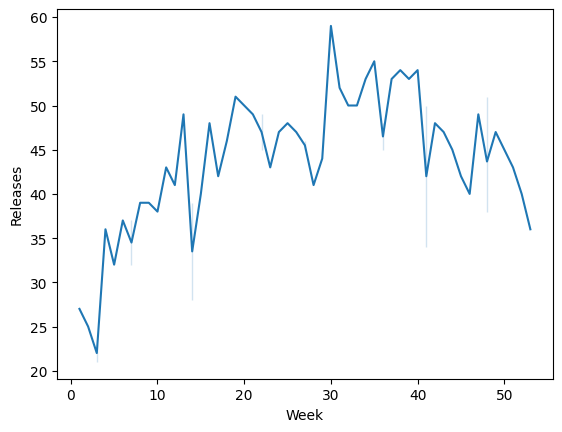

In [21]:
sns.lineplot(data = df2021, x = 'Week', y = 'Releases')

Plotted Line graph of Top 10 Gross vs. Weeks

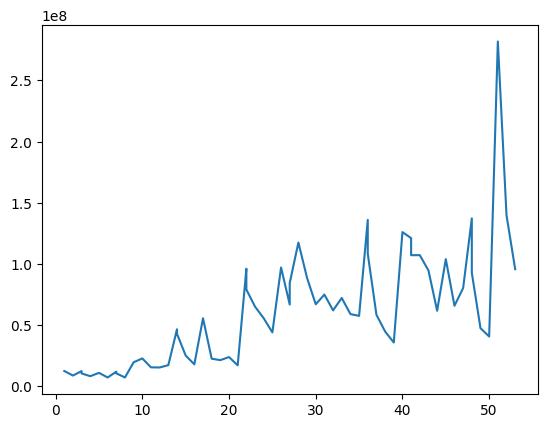

In [22]:
plt.plot(df2021['Week'],df2021['Top 10 Gross'])
plt.show()

In [23]:
#Save data fram to csv

df2021.to_csv('data2021.csv')